# Customer Churn Prediction – Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
plt.style.use("fivethirtyeight")

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

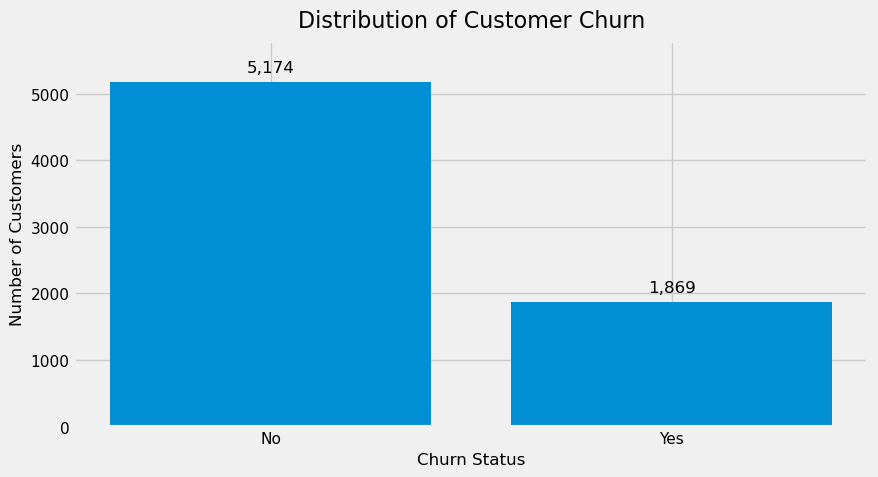

In [5]:
churn_counts = df['Churn'].value_counts().reindex(['No', 'Yes'])

fig, ax = plt.subplots()

bars = ax.bar(churn_counts.index, churn_counts.values)

ax.set_title("Distribution of Customer Churn", pad=10)
ax.set_xlabel("Churn Status")
ax.set_ylabel("Number of Customers")

ymax = churn_counts.max()
ax.set_ylim(0, ymax * 1.12)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + ymax * 0.02,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

**Comment:**

Approximately 26.5% of the customers in the dataset have churned. This indicates that customer attrition represents a non-negligible problem for the company. Therefore, it is crucial to further analyze the factors and customer characteristics that contribute to churn.

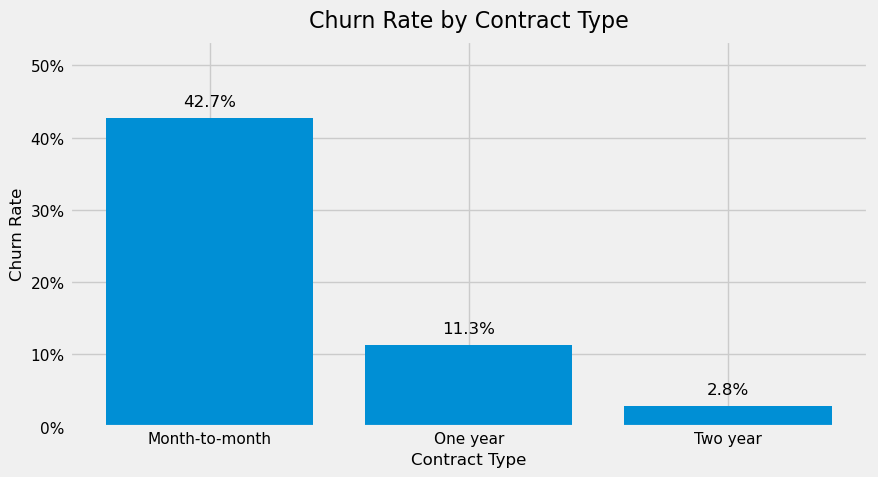

In [6]:
contract_order = ['Month-to-month', 'One year', 'Two year']

contract_churn = (
    pd.crosstab(df['Contract'], df['Churn'], normalize='index')
    .reindex(contract_order)
)

x = contract_churn.index
y = contract_churn['Yes'].values

fig, ax = plt.subplots()

bars = ax.bar(x, y)

ax.set_title("Churn Rate by Contract Type", pad=10)
ax.set_xlabel("Contract Type")
ax.set_ylabel("Churn Rate")

ymax = y.max()
ax.set_ylim(0, ymax * 1.25)

ax.yaxis.set_major_formatter(lambda val, pos: f"{int(val*100)}%")

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + ymax * 0.03,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

**Comment:**

Customers with month-to-month contracts exhibit a substantially higher churn rate compared to those with one-year or two-year contracts. As the contract duration increases, the likelihood of churn decreases sharply. This indicates that encouraging customers to commit to longer-term contracts could be a key strategy for improving customer retention.

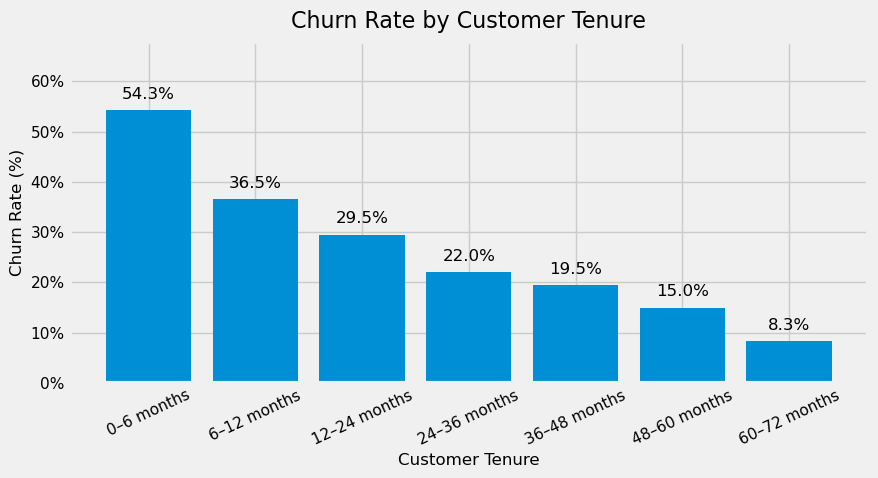

In [7]:
bins = [-0.001, 6, 12, 24, 36, 48, 60, 72]
labels = ["0–6 months", "6–12 months", "12–24 months", "24–36 months",
          "36–48 months", "48–60 months", "60–72 months"]

tenure_group = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

tenure_churn = (
    df.assign(TenureGroup=tenure_group)
      .groupby('TenureGroup', observed=True)['Churn']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
)

tenure_churn_rate = tenure_churn.get('Yes', pd.Series(0, index=tenure_churn.index))

fig, ax = plt.subplots()

bars = ax.bar(tenure_churn_rate.index.astype(str), tenure_churn_rate.values)

ax.set_title("Churn Rate by Customer Tenure", pad=10)
ax.set_xlabel("Customer Tenure")
ax.set_ylabel("Churn Rate (%)")

ymax = tenure_churn_rate.max()
ax.set_ylim(0, ymax * 1.25)

ax.yaxis.set_major_formatter(lambda v, _: f"{int(v*100)}%")
ax.tick_params(axis='x', rotation=25)

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + ymax * 0.03,
        f"{h*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

**Comment:**

The churn rate is significantly higher during the early stages of the customer lifecycle, particularly within the first 6 months. As customer tenure increases, the likelihood of churn decreases steadily. This indicates that the initial onboarding period is critical for customer retention, and early-stage interventions could substantially reduce churn.


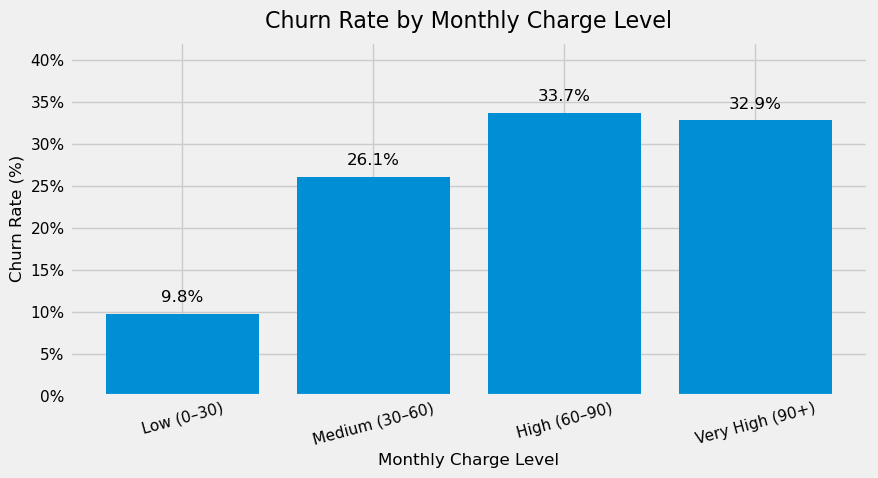

In [8]:
bins = [0, 30, 60, 90, 120]
labels = ["Low (0–30)", "Medium (30–60)", "High (60–90)", "Very High (90+)"]

charge_group = pd.cut(
    df['MonthlyCharges'],
    bins=bins,
    labels=labels,
    right=False
)

charge_churn = (
    df.assign(ChargeGroup=charge_group)
      .groupby('ChargeGroup', observed=True)['Churn']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
)

charge_churn_rate = charge_churn.get('Yes', pd.Series(0, index=charge_churn.index))

fig, ax = plt.subplots()

bars = ax.bar(charge_churn_rate.index.astype(str), charge_churn_rate.values)

ax.set_title("Churn Rate by Monthly Charge Level", pad=10)
ax.set_xlabel("Monthly Charge Level")
ax.set_ylabel("Churn Rate (%)")

ymax = charge_churn_rate.max()
ax.set_ylim(0, ymax * 1.25)

ax.yaxis.set_major_formatter(lambda v, _: f"{int(v*100)}%")
ax.tick_params(axis='x', rotation=15)

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + ymax * 0.03,
        f"{h*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

**Comment:**

Customers with higher monthly charges exhibit substantially higher churn rates compared to those in lower pricing segments. The churn rate increases sharply from low to high pricing levels, but stabilizes at very high charges, indicating a plateau effect. This suggests that price sensitivity is a key driver of churn, particularly up to a certain pricing threshold, after which other factors may play a more dominant role.

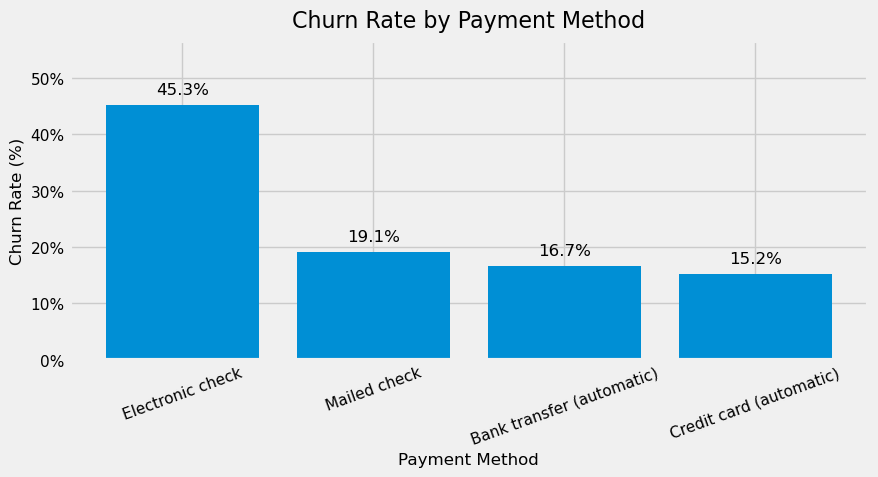

In [9]:
payment_churn = (
    df.groupby('PaymentMethod', observed=True)['Churn']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
)

payment_churn_rate = (
    payment_churn.get('Yes', pd.Series(0, index=payment_churn.index))
    .sort_values(ascending=False)
)

fig, ax = plt.subplots()

bars = ax.bar(payment_churn_rate.index.astype(str), payment_churn_rate.values)

ax.set_title("Churn Rate by Payment Method", pad=10)
ax.set_xlabel("Payment Method")
ax.set_ylabel("Churn Rate (%)")

ymax = payment_churn_rate.max()
ax.set_ylim(0, ymax * 1.25)

ax.yaxis.set_major_formatter(lambda v, _: f"{int(v*100)}%")
ax.tick_params(axis='x', rotation=20)

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + ymax * 0.03,
        f"{h*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

**Comment:**

Customers using electronic check as a payment method exhibit significantly higher churn rates compared to those using other payment methods. In contrast, customers who use automatic payment methods such as credit cards or bank transfers show notably lower churn rates. This suggests that payment convenience and automation are associated with stronger customer commitment and may help reduce churn.

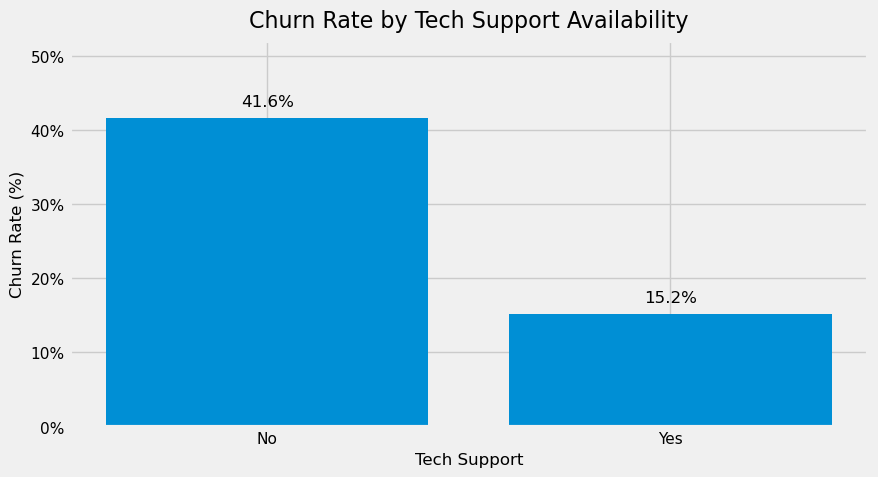

In [10]:
tech_df = df[df['TechSupport'] != 'No internet service']

tech_churn = (
    tech_df.groupby('TechSupport', observed=True)['Churn']
           .value_counts(normalize=True)
           .unstack(fill_value=0)
)

tech_churn_rate = tech_churn.get('Yes', pd.Series(0, index=tech_churn.index))

fig, ax = plt.subplots()

bars = ax.bar(tech_churn_rate.index.astype(str), tech_churn_rate.values)

ax.set_title("Churn Rate by Tech Support Availability", pad=10)
ax.set_xlabel("Tech Support")
ax.set_ylabel("Churn Rate (%)")

ymax = tech_churn_rate.max()
ax.set_ylim(0, ymax * 1.25)

ax.yaxis.set_major_formatter(lambda v, _: f"{int(v*100)}%")

for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + ymax * 0.03,
        f"{h*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

**Comment:**

Among customers who use internet services, those without technical support exhibit significantly higher churn rates compared to those who receive technical support. This highlights the critical role of service quality and post-sale support in customer retention. Providing accessible and effective technical support can substantially reduce churn among active internet users.
